<a href="https://colab.research.google.com/github/haronghatong/private_project/blob/main/Stable_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install diffusers transformers accelerate

In [ ]:
from PIL import Image
from diffusers import StableDiffusionPipeline
import torch
import time
from IPython.display import display, clear_output, Image
import os
from IPython.display import Image as IPImage

# 이미지 생성

## 이미지

  0%|          | 0/50 [00:00<?, ?it/s]

이미지가 생성되었습니다: generated_image.png


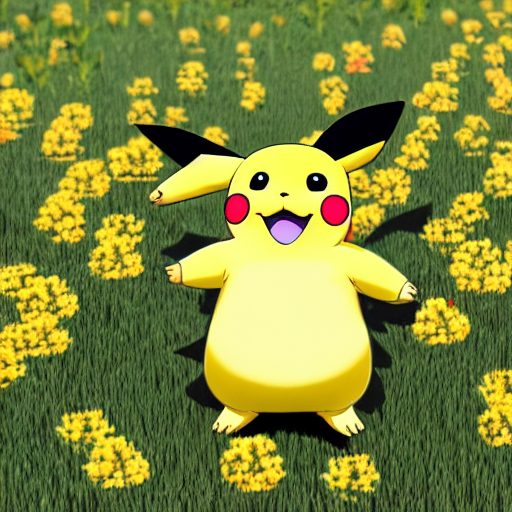

In [ ]:
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")  # GPU 사용

# 3. 텍스트 프롬프트 입력 (지브리 스타일 마을 풍경)
prompt = "A cheerful Pikachu standing in a sunny meadow surrounded by flowers, in a cartoon style"


# 4. 이미지 생성
image = pipe(prompt).images[0]

# 5. 결과 저장 및 표시
image.save("generated_image.png")
print("이미지가 생성되었습니다: generated_image.png")

# Colab에서 생성된 이미지 보기

display(image)

## 애니메이션

In [ ]:
# Stable Diffusion 모델 로드
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")  # GPU 사용

# 기본 프롬프트 설정
base_prompt = "A cheerful Pikachu standing in a sunny meadow surrounded by flowers, in a cartoon style"

# 프레임마다 약간의 변화 추가
prompts = [
    base_prompt + ", with a gentle breeze blowing the flowers",
    base_prompt + ", with butterflies flying around",
    base_prompt + ", with Pikachu waving its hand",
    base_prompt + ", with the sun setting in the background",
    base_prompt + ", with stars beginning to appear in the sky"
]

# 각 프롬프트에 따라 이미지 생성
images = []
for prompt in prompts:
    print(f"Generating image for prompt: {prompt}")
    try:
        image = pipe(prompt).images[0]
        images.append(image)
    except Exception as e:
        print(f"Error generating image: {e}")
        images.append(Image.new("RGB", (512, 512), "black"))  # 검은색 이미지 추가

# 이미지 크기 통일
images = [img.resize((512, 512)) for img in images]

# 생성된 이미지 출력
print("Generated images:")
for i, img in enumerate(images):
    img.show(title=f"Image {i+1}")

# GIF 저장
gif_file = "pikachu_animation.gif"
try:
    images[0].save(
        gif_file,
        save_all=True,
        append_images=images[1:],  # 나머지 이미지 추가
        duration=500,             # 각 프레임 지속 시간 (ms)
        loop=3                    # GIF를 3번 반복 재생
    )
    print(f"GIF saved as {gif_file}")
except Exception as e:
    print(f"Error saving GIF: {e}")

# GIF 파일 확인
if os.path.exists(gif_file):
    print("GIF file successfully created!")
else:
    print("GIF file creation failed.")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Generating image for prompt: A cheerful Pikachu standing in a sunny meadow surrounded by flowers, in a cartoon style, with a gentle breeze blowing the flowers


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image for prompt: A cheerful Pikachu standing in a sunny meadow surrounded by flowers, in a cartoon style, with butterflies flying around


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image for prompt: A cheerful Pikachu standing in a sunny meadow surrounded by flowers, in a cartoon style, with Pikachu waving its hand


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image for prompt: A cheerful Pikachu standing in a sunny meadow surrounded by flowers, in a cartoon style, with the sun setting in the background


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image for prompt: A cheerful Pikachu standing in a sunny meadow surrounded by flowers, in a cartoon style, with stars beginning to appear in the sky


  0%|          | 0/50 [00:00<?, ?it/s]

Generated images:
GIF saved as pikachu_animation.gif
GIF file successfully created!


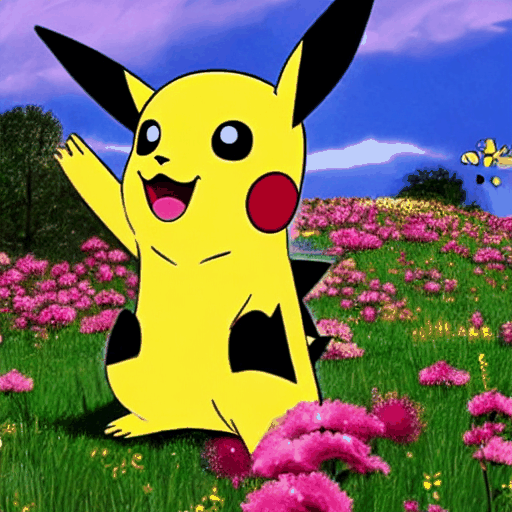

In [ ]:
# GIF 파일 경로
gif_file = "/content/pikachu_animation.gif"

# GIF 출력
Image(filename=gif_file)

## 짧은 스토리 진행

In [ ]:
# Stable Diffusion 모델 로드
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")  # GPU 사용

# 탐험 스토리 프롬프트
prompts = [
    "A cheerful Pikachu standing at the entrance of a lush green forest, with sunlight streaming through the trees, ready for an adventure.",
    "Pikachu standing by a small sparkling lake in the middle of the forest, looking at its reflection in the water.",
    "Pikachu happily playing with an Eevee in a sunny forest clearing, surrounded by flowers and butterflies.",
    "Pikachu hiding under a large tree in the forest as rain pours down, with thunder and lightning in the background.",
    "Pikachu walking peacefully through a glowing forest after the rain, with a beautiful rainbow in the sky."
]

# 이미지 생성 및 저장
images = []
for i, prompt in enumerate(prompts):
    image = pipe(prompt).images[0]  # 이미지 생성
    image.save(f"frame_{i}.png")   # 이미지 저장
    images.append(image)

# GIF 생성
from PIL import Image

images[0].save(
    "pikachu_exploration.gif",
    save_all=True,
    append_images=images[1:],
    duration=700,  # 프레임 지속 시간 (밀리초)
    loop=0         # 반복 횟수 (0은 무한 반복)
)

print("애니메이션 생성 완료!")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:  14%|#3        | 164M/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   4%|4         | 150M/3.44G [00:00<?, ?B/s]

model.safetensors:  34%|###4      | 168M/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

애니메이션 생성 완료!


In [ ]:
from PIL import Image

# 이미지 파일 로드
image_files = ["frame_0.png", "frame_1.png", "frame_2.png", "frame_3.png", "frame_4.png"]
images = [Image.open(img) for img in image_files]

# GIF 생성
images[0].save(
    "pikachu_exploration.gif",
    save_all=True,
    append_images=images[1:],
    duration=700,  # 프레임 지속 시간 (밀리초)
    loop=0         # 반복 횟수 (0은 무한 반복)
)

print("GIF 생성 완료!")


GIF 생성 완료!


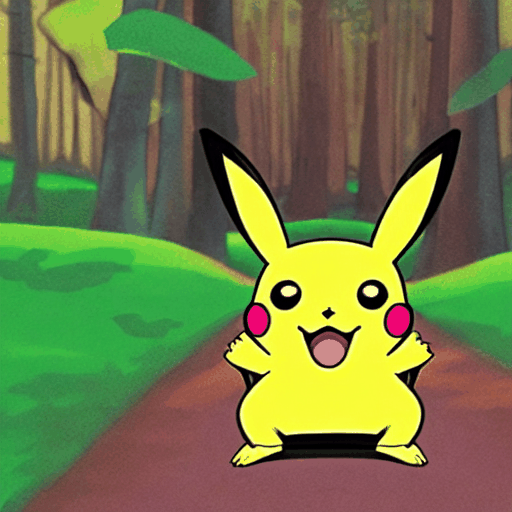

In [ ]:
from IPython.display import Image as IPImage
display(IPImage(filename="pikachu_exploration.gif"))

## 자연스러운 gif 만들기

In [ ]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image

# Stable Diffusion 모델 로드
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")
pipe.enable_attention_slicing()  # 메모리 효율화

# 일관된 캐릭터와 배경을 위한 상세한 프롬프트
character_desc = "cute yellow Pikachu with red cheeks, anime style, high quality, detailed, 4k"
scene_style = "Studio Ghibli style background, soft lighting, detailed environment"
negative_prompt = "ugly, deformed, noisy, blurry, low quality, distorted, disfigured, bad anatomy"

# 연속된 스토리라인을 가진 프롬프트
prompts = [
    f"{character_desc}, standing at the entrance of a magical forest path, {scene_style}, morning sunlight filtering through trees, peaceful atmosphere",
    f"{character_desc}, discovering a hidden crystal clear lake in the same forest, {scene_style}, reflections in water, same forest environment",
    f"{character_desc}, meeting a friendly brown Eevee in the same forest clearing, {scene_style}, playful interaction, forest flowers around them",
    f"{character_desc}, seeking shelter with Eevee under a large tree during rain, {scene_style}, gentle rain effects, cozy atmosphere",
    f"{character_desc}, walking with Eevee through the same forest path as morning, {scene_style}, rainbow appearing after rain, golden sunset light"
]

# 이미지 생성
images = []
seed = 21  # 일관성을 위한 기본 시드

for i, prompt in enumerate(prompts):
    # 각 이미지마다 약간의 변화를 주되, 기본 시드와 연관되게 설정
    generator = torch.Generator("cuda").manual_seed(seed + i)

    image = pipe(
        prompt,
        negative_prompt=negative_prompt,
        num_inference_steps=50,
        guidance_scale=7.5,
        generator=generator
    ).images[0]

    # 이미지 크기 일관성 유지
    image = image.resize((512, 512), Image.LANCZOS)
    image.save(f"frame_{i}.png")
    images.append(image)

# GIF 생성 - 단순하게 프레임 전환
images[0].save(
    "pikachu_story.gif",
    save_all=True,
    append_images=images[1:],
    duration=1000,  # 각 장면을 1초씩 보여줌
    loop=0
)

print("스토리 애니메이션 생성 완료!")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
from IPython.display import Image as IPImage
display(IPImage(filename="pikachu_story.gif"))

## 새로운 스토리 gif

In [ ]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image

# 모델 로드
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")
pipe.enable_attention_slicing()

# 프롬프트 설정
prompts = [
    "white bunny eating pink flowers, soft fur, big eyes, cute anime style, pastel colors",
    "fluffy rabbit munching flowers, garden setting, sparkly eyes, soft lighting",
    "white bunny surrounded by flowers, gentle pose, chibi style, spring mood",
    "cute rabbit with floppy ears, eating flower petals, pastel garden"
]

# 네거티브 프롬프트
negative_prompt = "realistic, scary, dark, gore, dirty, photographic, human, detailed fur"

# 이미지 생성 설정
seed = 42
images = []

for i, prompt in enumerate(prompts):
    generator = torch.Generator("cuda").manual_seed(seed + i)

    image = pipe(
        prompt,
        negative_prompt=negative_prompt,
        num_inference_steps=50,
        guidance_scale=7.5,
        generator=generator
    ).images[0]

    image = image.resize((512, 512), Image.LANCZOS)
    image.save(f"bunny_story_{i+1}.png")
    images.append(image)

# 각 장면별 지속 시간 설정 (밀리초)
durations = [2500, 2500, 2500, 3000]

# GIF 생성
images[0].save(
    "bunny_eating_flowers.gif",
    save_all=True,
    append_images=images[1:],
    duration=durations,
    loop=0
)

print("토끼 스토리 애니메이션 생성 완료!")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
from IPython.display import Image as IPImage
display(IPImage(filename="bunny_eating_flowers.gif"))